In [15]:
import numpy as np 
import pandas as pd 

In [16]:
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D #Для отрисовки 3Д проэкции

matplotlib.rc("font", size = 18) #для увелечения шрифта

In [17]:
#Загружаем данные
houses = pd.read_csv("1.4_houses.csv")

In [63]:
houses.head(15)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0
7,23,14,medium,998.0
8,9,5,basic,225.0
9,29,26,luxury,2052.0


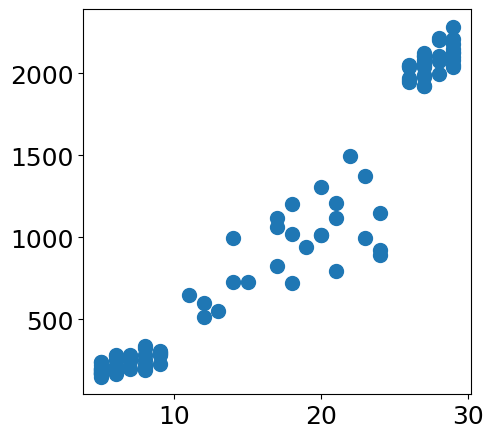

In [30]:
fig = plt.figure(figsize=(5,5)) #Создаем картинку
ax = plt.axes()

#Помещаем точки на график

ax.scatter(houses["dim_1"], houses["price"], s=100)

#Отображаем картинку
plt.show()

#### f(x)=a*x+b   линейная ригрессия ####
#### price = price(dim_1)= a*dim_1+b ####

In [22]:
# Импортируем модуль, отвечающий за линейную ригрессия
from sklearn.linear_model import LinearRegression


In [27]:
#выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1"]]
y = houses["price"]

#Создаем регрессор
reg = LinearRegression().fit(X,y)


In [28]:
reg.coef_

array([83.08870109])

In [29]:
reg.intercept_

-351.68469784672334

In [32]:
#Вытаскиваем нужные коэффиценты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(dim_1):
    return a+b*dim_1

In [33]:
reg_prediction(X.dim_1[0])

2057.887633711507

In [35]:
## Встроеный метод для расчета предсказаний
reg.predict(X[0:1])[0]

2057.887633711507

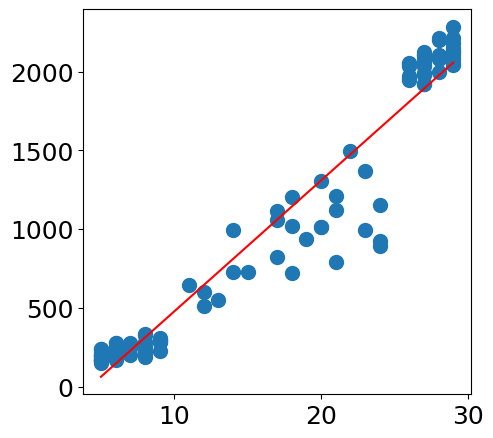

In [37]:
fig = plt.figure(figsize=(5,5)) ##Создаем картинку
ax = plt.axes()

## Помещаем точки на график
ax.scatter(houses["dim_1"], houses["price"], s=100)
##помещаем предсказание
ax.plot([X.dim_1.min(), X.dim_1.max()],[reg_prediction(X.dim_1.min()),reg_prediction(X.dim_1.max())], c="red")

##Отображаем картинку
plt.show()

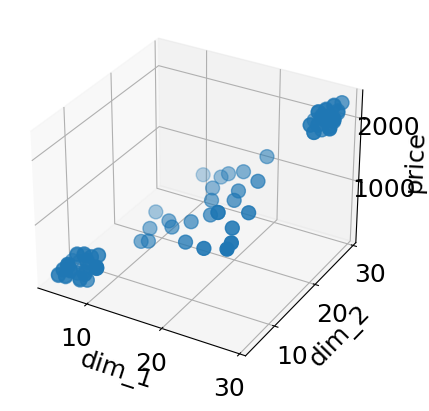

In [44]:
fig = plt.Figure(figsize=(15,15)) ##Создаем картинку
ax = plt.axes(projection='3d') ## Устанавливаем проэкцию 3д

ax.scatter(houses["dim_1"],houses["dim_2"],houses["price"],s=100) ##Помещаем на график точки

##Называем оси
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")

##отображаем картинку
plt.show()


In [45]:
##Импортируем модуль отвечающий за линейную ригрессию
from sklearn.linear_model import LinearRegression


In [46]:
##Выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1", "dim_2"]]
t = houses["price"]

##Создаем регрессор
reg = LinearRegression().fit(X,y)

In [47]:
##Вытаскиваем нужные коэфиценты
[b1, b2] = reg.coef_
a = reg.intercept_

##создаем функцию для предсказания цены дома
def reg_prediction(dim_1,dim_2):
    return a+b1*dim_1+b2*dim_2

In [48]:
reg_prediction(X.dim_1[0],X.dim_2[0])

2080.82359179565

In [50]:
##Используем встроеный метод для расчета предсказаний
reg.predict(X[0:1])[0]

2080.82359179565

In [61]:
##Сделаем предсказания для различных конфигураций домов
d1, d2 = list(), list()
for X in np.linspace(min(houses["dim_1"]), max(houses["dim_1"]), 100):
    for y in np.linspace(min(houses["dim_2"]),max(houses["dim_2"]), 100):
        d1.append(X)
        d2.append(y)
d1 = np.array(d1).reshape(-1,1)
d2 = np.array(d2).reshape(-1,1)
p=reg.predict(np.concatenate([d1,d2],axis=1))


/home/r/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


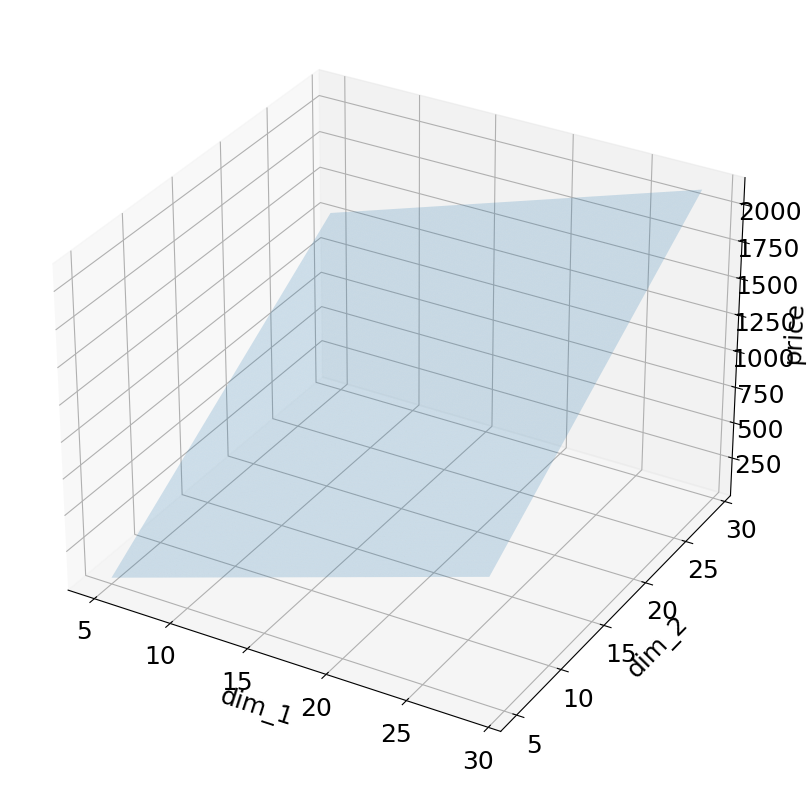

In [62]:
fig = plt.figure(figsize=(10,10))##Создаем картинку
ax = plt.axes(projection='3d')
##Помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(),alpha=0.2)

##Называем оси

ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")

##Изменяем позицию камеры и отрисовываем картинку
ax.alev = 27
plt.show()
